## Group members: Miti Nopnirapath, Tao Tianli, Yin Mingze, Zheng Ruohan, Zhu Yilin

## Generate synthetic data for linear regression

Create a function that generates a synthetic dataset for linear regression. The function should take the number of samples, the slope, the intercept, and noise as arguments, and return a NumPy array of input values (X) and corresponding output values (Y).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
def generate_synthetic_data(n_samples, slope, intercept, noise_std_dev):
    # Your code here
    """
    Input:
        num_samples (int): The number of samples to generate.
        slope (float): The slope of the linear relationship.
        intercept (float): The intercept of the linear relationship.
        noise (float): The standard deviation of the normally distributed noise.

        small improvement

    Output:
        Tuple of NumPy arrays (X, Y).
    """    
    X = np.linspace(0,5,n_samples)
    Y = intercept + slope * X + np.random.normal(0, noise_std_dev, n_samples)
    return X, Y    
    
X, Y = generate_synthetic_data(100, 2, 5, 1)

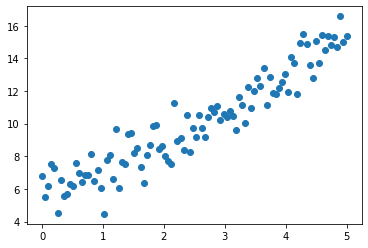

In [3]:
# visualise the synthetic data
plt.scatter(X, Y)

## Implement simple linear regression using the normal equation

Implement simple linear regression using the normal equation, and fit a model to the synthetic data generated in Exercise 1.

In [4]:
def normal_equation(X, Y):
    # Your code here
    
    #X_ has a constant column added
    X_ = np.vstack([np.ones(X.shape[0]), X]).T

    # b = np.linalg.inv(X_.T @ X_) @ X_.T @ Y #equivalent based on first principle
    b = np.linalg.solve(X_.T @ X_, X_.T @ Y) #numerically more stable
    return b

intercept_estimate, slope_estimate = normal_equation(X, Y)

In [5]:
print(f"Intercept using closed-form formula: {float(intercept_estimate)}")
print(f"Slope using closed-form formula: {float(slope_estimate)}")

Intercept using closed-form formula: 5.208471447842211
Slope using closed-form formula: 1.9405346270769106


## Use scikit-learn for linear regression

Use the scikit-learn library to fit a linear regression model to the synthetic data generated in Exercise 1, and compare the results with the models obtained in Exercises 2.

In [6]:
from sklearn.linear_model import LinearRegression

def sklearn_linear_regression(X, Y):
    # Your code here
    X = X.reshape(-1,1)
    Y = Y.reshape(-1,1)
    model = LinearRegression()
    model.fit(X, Y)
    slope_estimate = model.coef_
    intercept_estimate = model.intercept_
    return slope_estimate, intercept_estimate
slope_estimate, intercept_estimate = sklearn_linear_regression(X, Y)


In [7]:
print(f"Intercept using sklearn: {float(intercept_estimate)}")
print(f"Slope using sklearn: {float(slope_estimate)}")

Intercept using sklearn: 5.208471447842206
Slope using sklearn: 1.9405346270769113


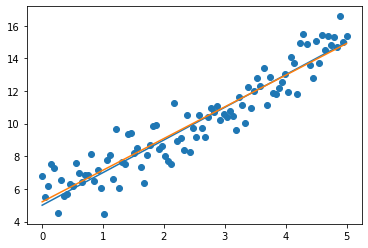

In [8]:
# visualise true form VS prediction

Y_true = 5 + 2 * X

Y_pred = intercept_estimate + slope_estimate * X

plt.scatter(X, Y)
plt.plot(X.reshape(-1,1), Y_true.reshape(-1,1))
plt.plot(X.reshape(-1,1), Y_pred.reshape(-1,1))

## Evaluate model performance

Create a function that calculates the Mean Squared Error (MSE) and R-squared score for a given set of true output values (Y) and predicted output values (Y_pred).

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
def evaluate_model(Y, Y_pred):
    # Your code here
    Y = Y.reshape(-1,1)
    Y_pred = Y_pred.reshape(-1,1)
    r2 = 1 - (sum((Y-Y_pred)**2)) / (sum((Y-Y.mean())**2))
    mse = mean_squared_error(Y, Y_pred)
    return mse, r2
mse, r2 = evaluate_model(Y, Y_pred)


In [11]:
print(f"Mean Squared Error: {float(mse)}")
print(f"R-squared: {float(r2)}")

Mean Squared Error: 1.008310853468612
R-squared: 0.8881140743377214


## End of Group Assignment - week 2